In [1]:
import sys
sys.path.append('../')

In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import importlib
import yolo3

In [3]:
importlib.reload(yolo3)

from yolo3.yolo import YOLO
from yolo3 import utils

Using TensorFlow backend.


In [4]:
model_params = {
        "model_path": '../model_data/yolo.h5',
        "anchors_path": '../model_data/yolo_anchors.txt',
        "classes_path": '../model_data/coco_classes.txt',
        "score" : 0.6,
        "iou" : 0.45,
        "model_image_size" : (608, 608),
        "gpu_num" : 1,
    }

In [5]:
yolo = YOLO(**model_params)

Instructions for updating:
Colocations handled automatically by placer.
../model_data/yolo.h5 model, anchors, and classes loaded.


In [6]:
yolo.anchors

array([[ 10.,  13.],
       [ 16.,  30.],
       [ 33.,  23.],
       [ 30.,  61.],
       [ 62.,  45.],
       [ 59., 119.],
       [116.,  90.],
       [156., 198.],
       [373., 326.]])

In [7]:
colors = utils.generate_colormap(len(yolo.class_names))

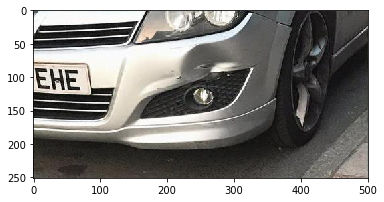

In [8]:
img = Image.open(
    '../../car-damage-estimation/data/myhistory_cropped/0A802B8F-06DE-435C-865F-0489AA532C2C/0A802B8F-06DE-435C-865F-0489AA532C2C_0.jpg')
plt.imshow(img)

In [9]:
boxes, scores, classes = yolo.detect(img)

(608, 608, 3)
Found 1 boxes for img
elapsed  3.1251988469994103


In [10]:
for box, score, cls in zip(boxes, scores, classes):
    print(yolo.class_names[cls])
    print('box', box)
    print('score', score)  

car
box [  5.9558063  -2.2191741 191.2288    351.5595   ]
score 0.94813216


In [11]:
font = '../font/FiraMono-Medium.otf'

car 0.95 (0, 6) (352, 191)
0.011022696999134496


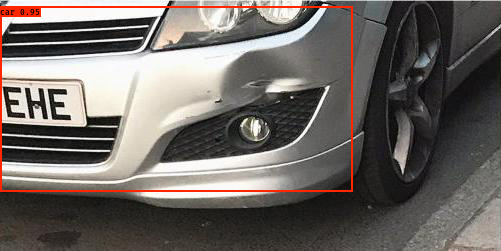

In [12]:
utils.draw_results(img, boxes, scores, classes, yolo.class_names, colors, font)